In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd /content/drive/My Drive/Colab Notebooks/For git

/content/drive/My Drive/Colab Notebooks/For git


In [3]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/For git/')

In [4]:
from all_methods import *

Using TensorFlow backend.


###Подготовка первых признаковых описаний

In [5]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/'
update_way(way)

In [6]:
# если использовать это, то следующую ячейку выполнять не надо
objects = np.load(way + 'objects__tr=50_smpl=100.npy')
features1 = np.load(way + 'features1__tr=50_smpl=100.npy')
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)

Количество элементов по трассам 315, по дискретам 4, всего 1260

Количество элементов по трассам 1000, по дискретам 2, всего 2000

Количество элементов по трассам 1000, по дискретам 3, всего 3000

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 1000, по дискретам 6, всего 6000

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 242, по диск

100%|██████████| 17079/17079 [02:08<00:00, 133.16it/s]


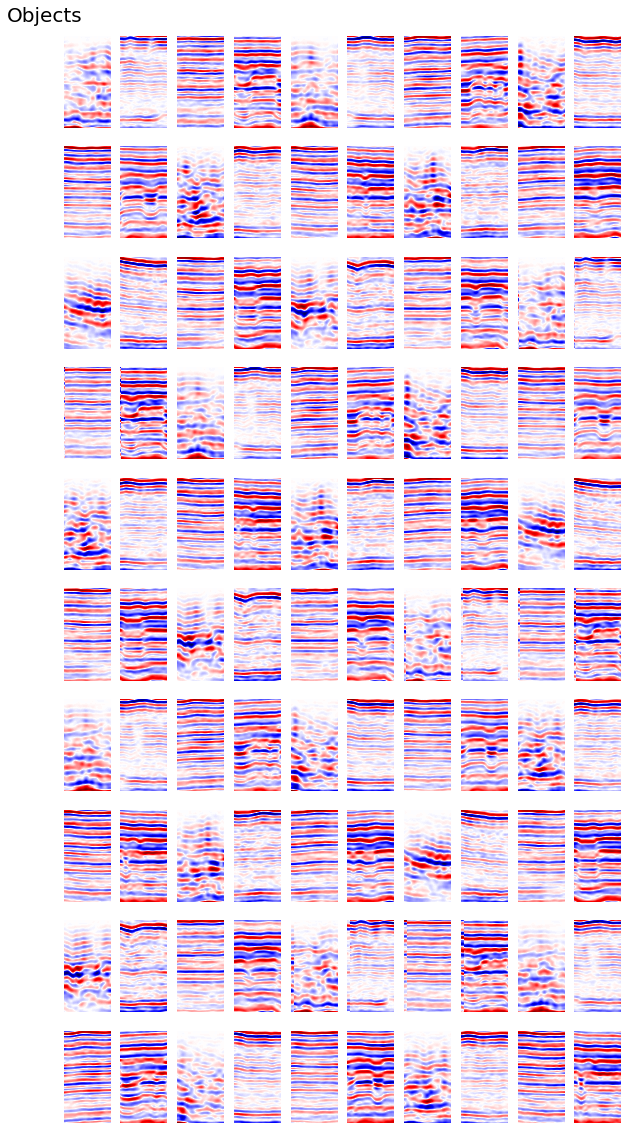

In [ ]:
ampField = np.load("ampField.npy", allow_pickle=True)
objects = create_objects('objects', ampField, num_traces=50, num_samples=100)
features1 = create_features1('features1', objects)
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)
visualize_objects(objects[:100])

###Кластеризация после автоэнкодера до 10

In [ ]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/Autoencoder/'
update_way(way)

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
autoen10 = load_model(way + 'X_autoen10.h5')
X_autoen10 = autoen10.get_layer(name="encoder").predict(X)

Train on 14518 samples, validate on 2562 samples
Epoch 1/2000
14518/14518 [==============================] - 1s 46us/step - loss: 0.8461 - mae: 0.5399 - val_loss: 0.7194 - val_mae: 0.5064
Epoch 2/2000
14518/14518 [==============================] - 0s 22us/step - loss: 0.7457 - mae: 0.5020 - val_loss: 0.6052 - val_mae: 0.4686
Epoch 3/2000
14518/14518 [==============================] - 0s 21us/step - loss: 0.6034 - mae: 0.4375 - val_loss: 0.5375 - val_mae: 0.4250
Epoch 4/2000
14518/14518 [==============================] - 0s 22us/step - loss: 0.5786 - mae: 0.4231 - val_loss: 0.5286 - val_mae: 0.4214
Epoch 5/2000
14518/14518 [==============================] - 0s 21us/step - loss: 0.5714 - mae: 0.4200 - val_loss: 0.5213 - val_mae: 0.4208
Epoch 6/2000
14518/14518 [==============================] - 0s 21us/step - loss: 0.5311 - mae: 0.4008 - val_loss: 0.4356 - val_mae: 0.3742
Epoch 7/2000
14518/14518 [==============================] - 0s 21us/step - loss: 0.4719 - mae: 0.3654 - val_loss: 0.4

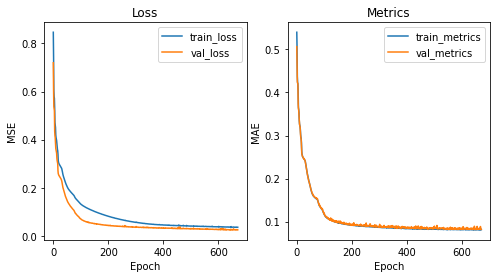

<Figure size 432x288 with 0 Axes>

In [ ]:
X_autoen10 = reduce_autoencoder(X, 10)

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
X_autoen10_optics = pickle.load(open(way + 'X_autoen10_optics__min_samples=10_xi=1e-05_min_cluster_size=30.pkl', 'rb'))

In [14]:
# чем меньше min_samples, тем больше впадин у графика расстояния достижимости
X_autoen10_optics = clust_optics('X_autoen10_optics', X_autoen10, min_samples=10, xi=0.00001, min_cluster_size=30)

In [15]:
np.unique(X_autoen10_optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

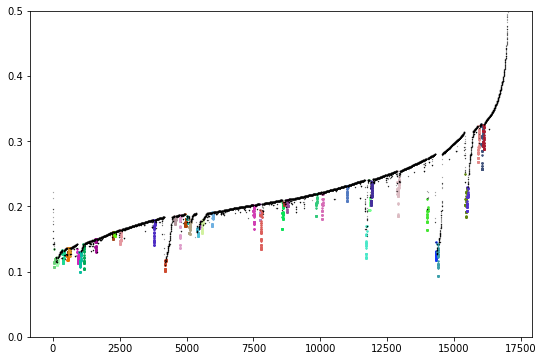

In [16]:
reachability_plot(X_autoen10_optics, limy=[0,0.5])

In [17]:
visualize_clusters(objects, X_autoen10_optics.labels_)

Output hidden; open in https://colab.research.google.com to view.

####Двумерная визуализация кластеризации в 10-мерном пространстве признаков

In [ ]:
# если использовать это, то следующую ячейку выполнять не надо
autoen2 = load_model(way + 'X_autoen2.h5')
X_autoen2 = autoen2.get_layer(name="encoder").predict(X)

In [ ]:
X_autoen2 = reduce_autoencoder('X_autoen2', X, 2)

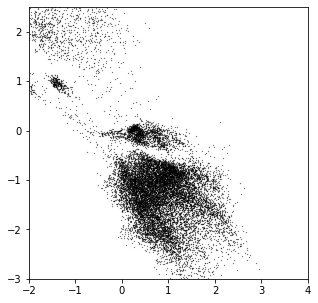

In [ ]:
draw_samples_2D(X_autoen2D, limx=[-2,4], limy=[-3,2.5])

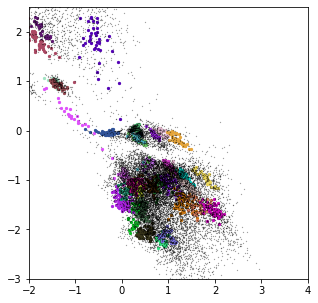

In [ ]:
draw_clusters_2D(X_autoen2, X_autoen10_optics.labels_, limx=[-2,4], limy=[-3,2.5])

####**Попытка кластеризации разрезов вне кластеров**

In [18]:
X_autoen10_invlabels = heavy_clusters(X_autoen10_optics)

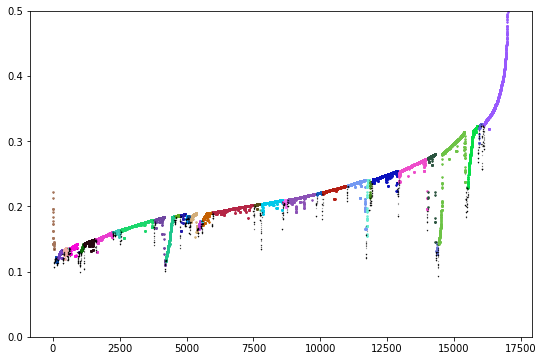

In [19]:
reachability_plot(X_autoen10_optics, labels_cluster_oder=X_autoen10_invlabels, limy=[0,0.5], limx=[0,0])

In [20]:
visualize_clusters(objects, X_autoen10_invlabels) # в этих как бы кластерах разрезы, во многом похожие на разрезы из хороших, выделенных выше кластеров

Output hidden; open in https://colab.research.google.com to view.

In [21]:
# Возьмём "кластеры" с 0 по 7 (в них явно просматривается наличие объектов из разных кластеров, которые были выделены в X_autoen10_optics)
for i in range(0,8):
  print(X_autoen10_invlabels[X_autoen10_invlabels == i].shape)

(41,)
(43,)
(173,)
(121,)
(3,)
(279,)
(3,)
(88,)


In [22]:
oneBadCluster = np.array([]) # работаем со всеми вместе
for i in range(0,8):
  temp = X_autoen10[X_autoen10_invlabels == i]
  if i == 0:
    oneBadCluster = temp
  else:
    oneBadCluster = np.vstack((oneBadCluster, temp))

In [23]:
oneBadCluster.shape

(751, 10)

In [24]:
oneBadCluster_optics = clust_optics('oneBadCluster_optics', oneBadCluster, min_samples=25, xi=0.0008, min_cluster_size=30)

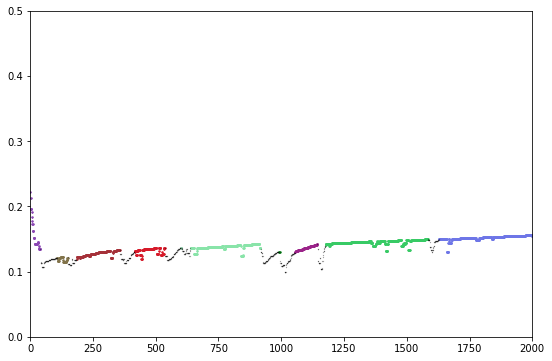

In [25]:
# казалось бы цветные линии почти непригодны для выделения на них кластеров
reachability_plot(X_autoen10_optics, labels_cluster_oder=X_autoen10_invlabels, limy=[0,0.5], limx=[0,2000])

In [26]:
np.unique(oneBadCluster_optics.labels_)

array([-1,  0,  1,  2,  3,  4])

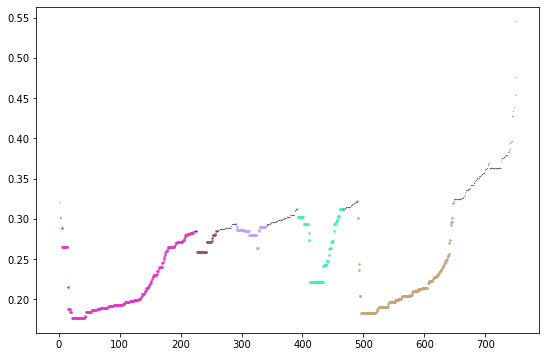

In [27]:
# но вот график для кластеризации только на подцвеченных объектах на предыдущем графике, появились минимумы
reachability_plot(oneBadCluster_optics)

In [28]:
oneBadClusterObjects = np.array([]) # собираем разрезы, соответствующие выбранным выше точкам на графике
for i in range(0,8):
  temp = objects[X_autoen10_invlabels == i]
  if i == 0:
    oneBadClusterObjects = temp
  else:
    oneBadClusterObjects = np.vstack((oneBadClusterObjects, temp))

In [29]:
oneBadClusterObjects.shape

(751, 50, 100)

In [30]:
# видим, что около половины объектов кластеризована
visualize_clusters(oneBadClusterObjects, oneBadCluster_optics.labels_)

Output hidden; open in https://colab.research.google.com to view.

#####Пояснение работы heavy_clusters()

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize) # отображение всего массива

In [ ]:
labels_new = X_autoen10_invlabels # кластеры после optics здесь -1
labels_new

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
labels_cluster_oder = X_autoen10_optics.labels_[X_autoen10_optics.ordering_]
labels_cluster_oder

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
labels_new - labels_cluster_oder

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,   1,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,  -2,  -2,  -2,  -2,  -2,
        -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,
        -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -2,  -